<a href="https://colab.research.google.com/github/bruno353/Machine-Learning/blob/main/Water_Quality_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##https://www.kaggle.com/adityakadiwal/water-potability

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/content/water_potability.csv')

#Data Visualization

In [3]:
df.shape

(3276, 10)

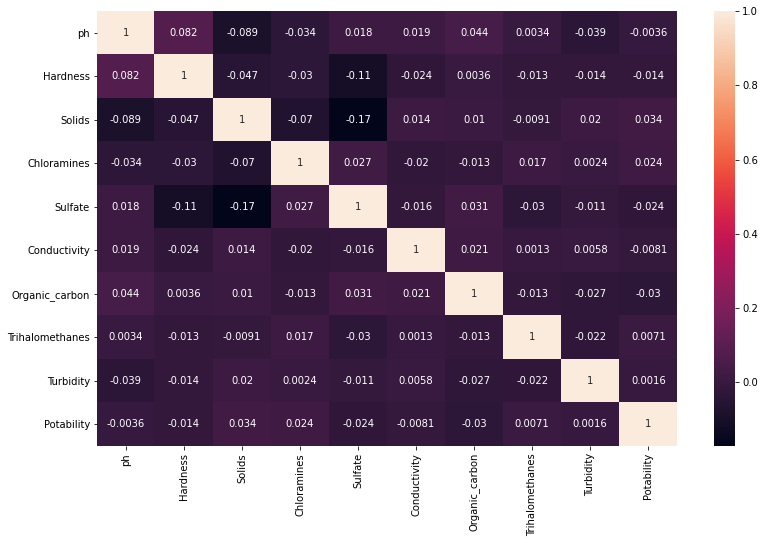

In [6]:
import matplotlib.pyplot as plt

import seaborn as sns
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(method='pearson'), annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80a434fa50>,
      dtype=object)

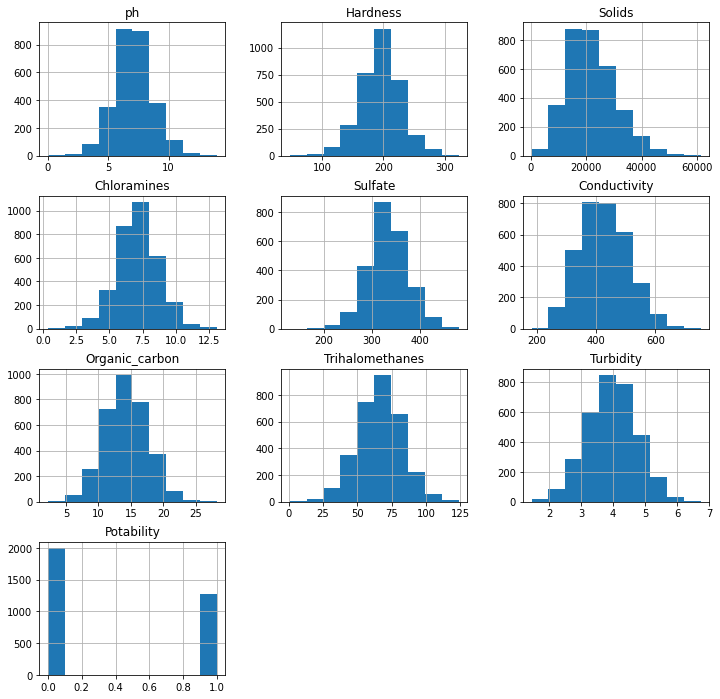

In [7]:
df.hist(figsize = (12,12))

#Data Cleaning

In [15]:
df.isna().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [12]:
df[df['ph'] == 'na']

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


In [13]:
df.sample(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
651,6.555439,195.157976,15405.496481,2.750837,NaN,436.278076,10.855263,NaN,3.792040,0
1499,6.999765,219.143373,16078.459386,7.652135,355.688892,282.502338,17.297556,65.065069,3.360131,1
3102,7.309596,193.472596,19343.149511,7.664061,306.685455,426.561928,12.844366,111.595448,4.048202,0
2585,7.426274,192.145254,36990.955947,5.101158,NaN,590.507222,18.736380,24.734227,4.363336,0
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2538,5.195921,175.157155,33473.112518,8.407450,319.253631,484.279890,16.812767,94.356954,5.375902,0
304,8.923981,135.938467,27919.770666,12.363285,NaN,415.629484,11.949914,69.314880,4.155583,1
1245,7.138374,184.745229,22575.188577,6.907714,NaN,504.865693,18.503762,66.136988,4.144872,0
1157,NaN,204.860505,24590.125934,7.774361,NaN,440.936824,12.567061,118.357275,4.318272,1
2573,8.115625,200.099013,15513.012581,6.046111,NaN,421.060326,8.320276,53.775592,4.408812,0


In [14]:
df.ph.fillna(df.ph.mean(), inplace = True)

In [17]:
df.Sulfate.fillna(df.Sulfate.mean(), inplace = True)

In [18]:
df.Trihalomethanes .fillna(df.Trihalomethanes .mean(), inplace = True)

In [19]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [21]:
from scipy.stats import skew
print(skew(df['ph']))
print(skew(df['Hardness']))
print(skew(df['Solids']))
print(skew(df['Chloramines']))
print(skew(df['Sulfate']))
print(skew(df['Conductivity']))
print(skew(df['Organic_carbon']))
print(skew(df['Trihalomethanes']))
print(skew(df['Turbidity']))

0.02778315290297795
-0.03932368888404235
0.6213498181329244
-0.012092899840854135
-0.041165512875302186
0.2643691049378588
0.025520889860291527
-0.08512202173612847
-0.007813062873377042


In [ ]:
#there isnt a  highly skewed feature, that's fine

#Modeling


In [23]:
Y = df.Potability

In [25]:
X = df.drop('Potability', axis = 1)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [38]:
features_x = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

In [39]:
X_train = sc.fit_transform(X_train[features_x])
X_test = sc.transform(X_test[features_x])

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5884146341463414

In [43]:
from sklearn.ensemble import RandomForestClassifier
model_r = RandomForestClassifier(n_estimators=1000)
model_r.fit(X_train, y_train)
model_r.score(X_test, y_test)

0.6387195121951219